In [1]:
!wget https://www.dropbox.com/s/p1wwpscwwv22xiy/train.zip?dl=0

--2022-05-17 23:55:32--  https://www.dropbox.com/s/p1wwpscwwv22xiy/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6020:18::a27d:4012, 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6020:18::a27d:4012|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/p1wwpscwwv22xiy/train.zip [following]
--2022-05-17 23:55:33--  https://www.dropbox.com/s/raw/p1wwpscwwv22xiy/train.zip
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc91276e8e75a0c2cfd680fb78c9.dl.dropboxusercontent.com/cd/0/inline/BlcJKqMSo6ghIYLVlbHJaaW3Zviqbul8nTkWLAjpQzHosvaLXgGiHKUYm7v1Sg3x0U7prz-rB20E2Z5L16M5OOJg8Id4xCTAhj1FFPEhPHOWJFRRZFBMVCCgiwyrpZUtZlv3LorHCjAnpUeW4mvd7KZDcrZa2mN0hR6gOHfhyHvmKQ/file# [following]
--2022-05-17 23:55:34--  https://uc91276e8e75a0c2cfd680fb78c9.dl.dropboxusercontent.com/cd/0/inline/BlcJKqMSo6ghIYLVlbHJaaW3Zviqbul8nTkWLAjpQzHosvaLXgGiH

  7300K .......... .......... .......... .......... .......... 15% 2.34M 23s
  7350K .......... .......... .......... .......... .......... 15% 1.64M 23s
  7400K .......... .......... .......... .......... .......... 15% 3.91M 23s
  7450K .......... .......... .......... .......... .......... 15% 1.76M 23s
  7500K .......... .......... .......... .......... .......... 15% 5.98M 23s
  7550K .......... .......... .......... .......... .......... 15% 4.48M 23s
  7600K .......... .......... .......... .......... .......... 15%  394K 24s
  7650K .......... .......... .......... .......... .......... 16% 8.20M 23s
  7700K .......... .......... .......... .......... .......... 16% 9.13M 23s
  7750K .......... .......... .......... .......... .......... 16% 4.38M 23s
  7800K .......... .......... .......... .......... .......... 16% 8.68M 23s
  7850K .......... .......... .......... .......... .......... 16% 8.93M 23s
  7900K .......... .......... .......... .......... .......... 16% 9.40M 23s

In [2]:
!unzip train.zip?dl=0

Archive:  train.zip@dl=0


  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.

1 file had no zipfile directory.
No zipfiles found.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [2]:
num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [3]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing Our Data Generator

In [4]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "C:/Users/Tesh/Project/data/train", 
                                               target_size=(224,224), 
                                               batch_size=batch_size,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "C:/Users/Tesh/Project/data/test", 
                                           target_size=(224,224), 
                                           batch_size=batch_size,
                                  )

Found 7178 images belonging to 7 classes.


# Data Visualization

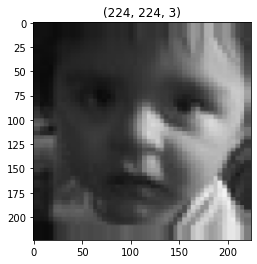

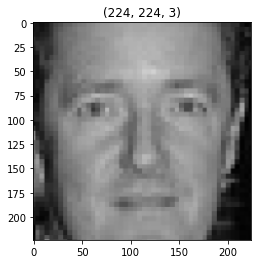

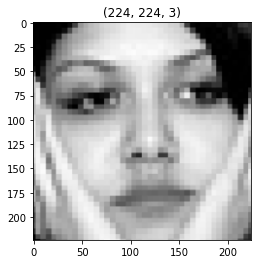

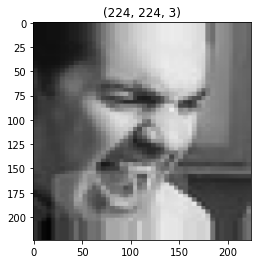

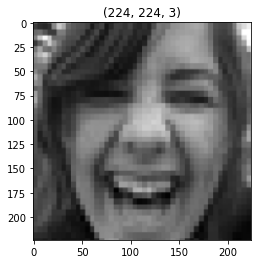

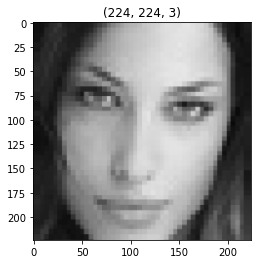

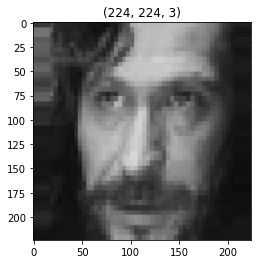

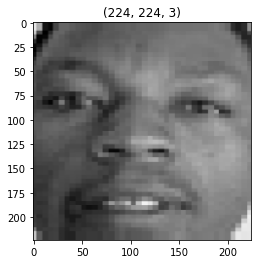

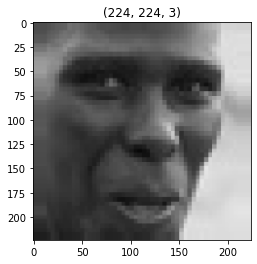

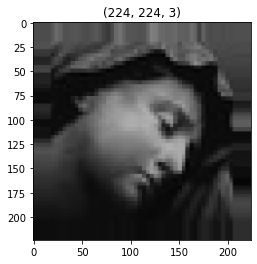

In [6]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# Create the model

In [7]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint

# model check point
mc = ModelCheckpoint(filepath="Model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [mc]

# Having Early stop and Model Checkpoint

In [8]:
hist = model.fit(train_data, 
                           steps_per_epoch= num_train // batch_size,
                           epochs= num_epoch, 
                           validation_data= val_data, 
                           validation_steps= num_val // batch_size, 
                           callbacks=[mc])

#hist = model.fit(train_data, 
   #                        steps_per_epoch= 5,
    #                       epochs= 3, 
      #                     validation_data= val_data, 
        #                   validation_steps= 8, 
          #                 callbacks=[mc])

Epoch 1/50
448/448 [==============================] - ETA: 0s - loss: 5.0368 - accuracy: 0.4428
Epoch 1: val_accuracy improved from -inf to 0.47419, saving model to Model.h5
448/448 [==============================] - 881s 2s/step - loss: 5.0368 - accuracy: 0.4428 - val_loss: 5.8778 - val_accuracy: 0.4742
Epoch 2/50
448/448 [==============================] - ETA: 0s - loss: 4.7591 - accuracy: 0.5123
Epoch 2: val_accuracy improved from 0.47419 to 0.48145, saving model to Model.h5
448/448 [==============================] - 698s 2s/step - loss: 4.7591 - accuracy: 0.5123 - val_loss: 5.4937 - val_accuracy: 0.4814
Epoch 3/50
448/448 [==============================] - ETA: 0s - loss: 4.6593 - accuracy: 0.5495
Epoch 3: val_accuracy improved from 0.48145 to 0.52595, saving model to Model.h5
448/448 [==============================] - 697s 2s/step - loss: 4.6593 - accuracy: 0.5495 - val_loss: 5.3543 - val_accuracy: 0.5259
Epoch 4/50
448/448 [==============================] - ETA: 0s - loss: 4.7615

448/448 [==============================] - 698s 2s/step - loss: 4.3827 - accuracy: 0.7085 - val_loss: 10.4980 - val_accuracy: 0.5519
Epoch 30/50
448/448 [==============================] - ETA: 0s - loss: 4.4570 - accuracy: 0.7094
Epoch 30: val_accuracy improved from 0.55190 to 0.55232, saving model to Model.h5
448/448 [==============================] - 695s 2s/step - loss: 4.4570 - accuracy: 0.7094 - val_loss: 10.8602 - val_accuracy: 0.5523
Epoch 31/50
448/448 [==============================] - ETA: 0s - loss: 4.6668 - accuracy: 0.7060
Epoch 31: val_accuracy did not improve from 0.55232
448/448 [==============================] - 698s 2s/step - loss: 4.6668 - accuracy: 0.7060 - val_loss: 10.5718 - val_accuracy: 0.5428
Epoch 32/50
448/448 [==============================] - ETA: 0s - loss: 4.3828 - accuracy: 0.7174
Epoch 32: val_accuracy did not improve from 0.55232
448/448 [==============================] - 697s 2s/step - loss: 4.3828 - accuracy: 0.7174 - val_loss: 10.5288 - val_accuracy

In [9]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("C:/Users/Tesh/Project/Model.h5")

In [10]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

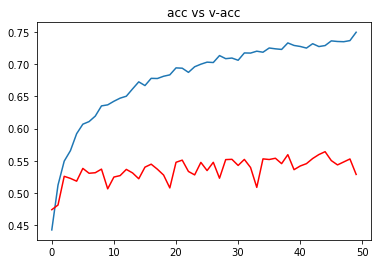

In [11]:
#Visualization for accuracy
#Lesser the difference between the acc and v-acc the more accurate will be the model.
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

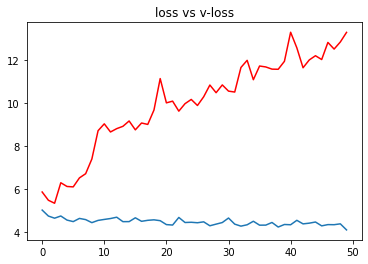

In [12]:
#Visualization for loss
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [13]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [16]:
#Runner Code

import os
import cv2
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>